In [1]:
import pandas as pd
import numpy as np
import os

# Change to project root directory
os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))
print(f"Changed working directory to: {os.getcwd()}")

from utils.model.model_manager import ModelManager

# Get absolute paths
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "BTCUSDT_5m_1h-pump05_170715_250302.csv")

# Load historical data
df = pd.read_csv(data_path, parse_dates=['timestamp'])

# Display the first few rows
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2017-08-17 04:00:00,4261.48,4280.56,4261.48,4261.48,2.189061,9.0,0.489061,2089.104962,0,...,NaN,0.287683,0.004477,0.223411,NaN,NaN,NaN,-0.553177,NaN,0.586207
1,2017-08-17 04:05:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.0,0.000000,0.000000,0,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.586207
2,2017-08-17 04:10:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.0,0.000000,0.000000,0,...,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.586207
3,2017-08-17 04:15:00,4261.48,4264.88,4261.48,4261.48,0.484666,9.0,0.085455,364.218136,0,...,NaN,0.214060,0.000798,0.176317,NaN,NaN,NaN,-0.647365,NaN,0.586207
4,2017-08-17 04:20:00,4264.88,4266.29,4264.88,4266.29,2.328570,11.0,1.546491,6595.688039,0,...,NaN,1.977410,0.000330,0.664138,NaN,NaN,NaN,0.328275,NaN,0.586207


In [2]:
# Initialize our model manager
symbol = "BTCUSDT"
start_date = "2017-07-15"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into our manager
manager.load_data(custom_path=data_path)

# Split and prepare data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(             open       high        low      close     volume  num_trades  \
 0         4261.48    4280.56    4261.48    4261.48   2.189061         9.0   
 1         4261.48    4261.48    4261.48    4261.48   0.000000         0.0   
 2         4261.48    4261.48    4261.48    4261.48   0.000000         0.0   
 3         4261.48    4264.88    4261.48    4261.48   0.484666         9.0   
 4         4264.88    4266.29    4264.88    4266.29   2.328570        11.0   
 ...           ...        ...        ...        ...        ...         ...   
 782744  105095.35  105104.48  105036.85  105046.17  18.596360      3981.0   
 782745  105046.18  105046.18  104980.00  104980.00  32.404840      4591.0   
 782746  104980.01  104980.01  104909.32  104923.38  17.046890      5707.0   
 782747  104923.38  104940.00  104770.34  104793.24  89.223820      8603.0   
 782748  104793.24  104795.72  104693.82  104722.94  55.574360      8240.0   
 
         taker_buy_base  taker_buy_quote    1m_roc  30m_volati

In [3]:
# Configure our model with default parameters
manager.configure_model()

# Train the model and evaluate on test set
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.5, min_precision=0.5)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.3412


np.float64(0.34121491097683615)

In [4]:
# Get and print model performance metrics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.3412
AUC-ROC Score: 0.9982

Overall Metrics:
Accuracy:  0.9957
Precision: 0.9952
Recall:    0.9957
F1-Score:  0.9953

Class 0 Metrics:
Precision: 0.9967
Recall:    0.9990
F1-Score:  0.9978

Class 1 Metrics:
Precision: 0.7632
Recall:    0.5088
F1-Score:  0.6105

Using raw probabilities
Classification threshold: 0.3412
{'accuracy': 0.9957180881842379, 'precision': 0.995204471576601, 'recall': 0.9957180881842379, 'f1': 0.995292263800954, 'auc_roc': np.float64(0.9982464315495168), 'optimal_threshold': np.float64(0.34121491097683615), 'precision_0': 0.9967453213995118, 'recall_0': 0.9989515377446412, 'f1_0': 0.9978472101006575, 'precision_1': 0.7631578947368421, 'recall_1': 0.5087719298245614, 'f1_1': 0.6105263157894737}



🎯 Generating SHAP analysis...

📉 Bottom 20 features by SHAP importance:
Bottom 20 features explain 0.00% of total SHAP value magnitude
Top 20 features explain 99.06% of total SHAP value magnitude
Ratio (Top/Bottom): infx


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
/Users/oliulv/Documents/foak/utils/model/model_manager.py:205: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"Ratio (Top/Bottom): {(top_importance/bottom_importance):.2f}x")


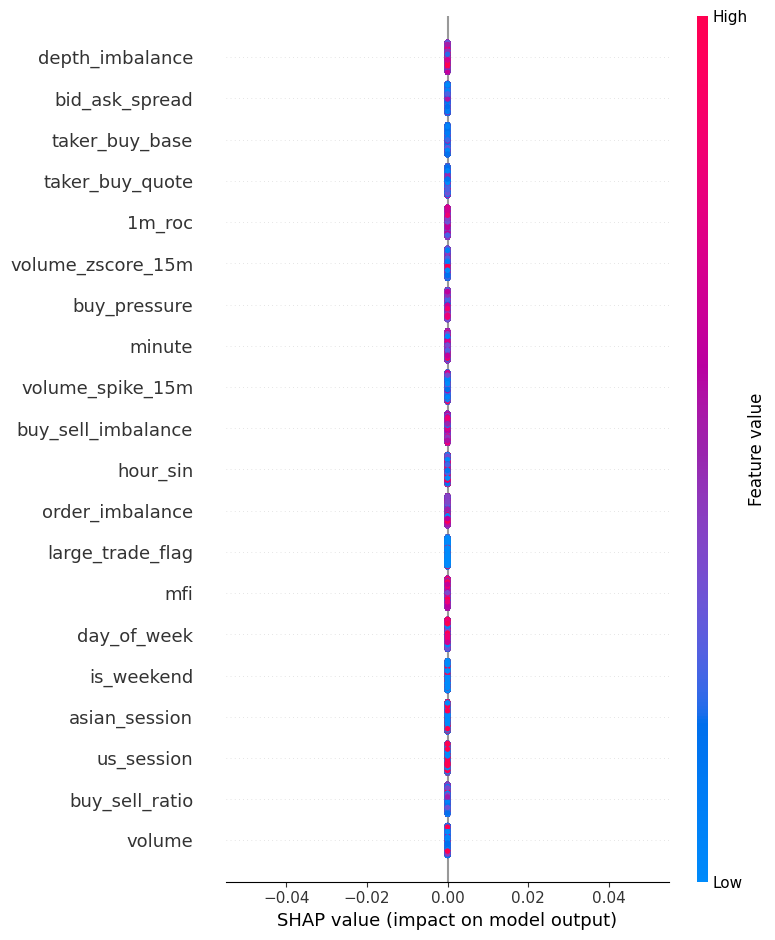

In [14]:
manager.plot_shap_analysis(show_bottom=True, n_features=20)


📈 Plotting feature importance...

📉 Bottom 25 features contribution:
Bottom 25 features explain 1.11% of total importance
Top 25 features explain 97.41% of total importance
Ratio (Top/Bottom): 87.67x


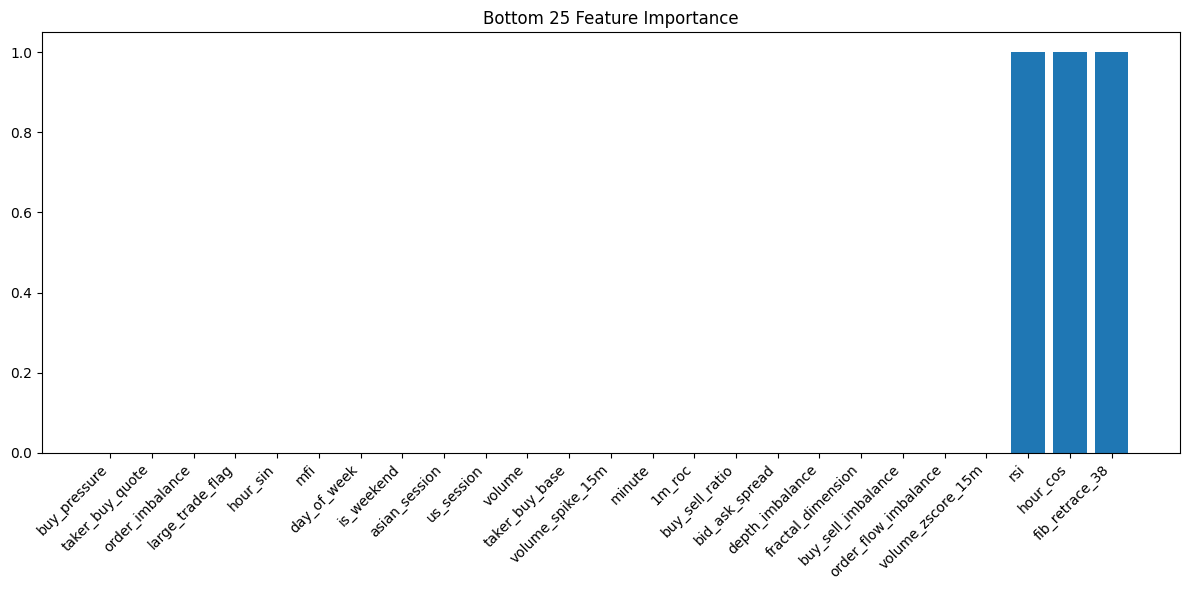

In [19]:
manager.plot_feature_importance(show_bottom=True, n_features=25)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store original params
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    initial_train_ratio=0.3,
    step_ratio=0.07,
    threshold=manager.optimal_threshold
)

# Config new model for wf
manager.configure_walk_forward_model()

# Prepare features and labels
X = manager.df.drop(["label"], axis=1)
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    model=manager.model,
    X=X,
    y=y,
)

In [ ]:
# Plot metrics over time
wf.plot_metrics_over_time()

In [ ]:
# Initialize ExperimentTracker
from utils.model.experiment_tracker import ExperimentTracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="5m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, initial_train_ratio=0.3, step_ratio=0.07)